In [3]:
from IPython.display import display, Image, Math, Latex
from IPython.core.display import HTML

## Po co to wszystko?

<img src="pictures\data_science_diagram.png" width="500px" align="center"/>

## Instalujemy środowisko pracy

<img src="pictures\anaconda.png" width="1000" align="left"/>

### Odpalamy jupyter notebook ...
##### Znajdź w Windows Anaconda Prompt, otwórz i wpisz: jupyter notebook

<img src="pictures\jupyter_notebook_open.PNG" width="1000" align="left"/>

### ... i tworzymy nowy plik 

<img src="pictures\new_python3_notebook.PNG" width="1000" align="left"/>

#### Początki nie muszą być trudne - import bibliotek

In [4]:
import numpy as np   #matematyka zamknięta w Pythona 
import pandas as pd  #podstawowe struktury danych
import matplotlib.pyplot as plt #obrazki :) 

from sklearn.linear_model import LinearRegression   #nasz pierwszy model ...
from sklearn.metrics import mean_absolute_error as mae  #... i pomiar jego skuteczności

%matplotlib inline 

#### Trochę matematyki dla rozluźnienia - rozkład normalny

In [5]:
display(Math(r'\Phi(x) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{x} e^{-\frac{t^2}{2}} dt'))

<IPython.core.display.Math object>

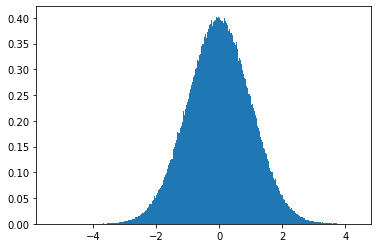

In [6]:
normal_dist = list(np.random.normal(0,1,500000))
plt.hist(normal_dist,300,density=True);

#### Programowanie funkcjami stoi - jak sprawnie pisać kod 

In [7]:
def random_linear_points(a=1,b=0,num_of_points=100):
    x = list(np.linspace(0,1,num_of_points))
    y = [a*i + b + np.random.normal(0,np.sqrt(a)) for i in x]
    
    return pd.DataFrame(zip(x,y), columns = ['x', 'y'])

In [8]:
data = random_linear_points(50.39,17.55,187)


#### Pismo obrazkowe - podobno dociera lepiej 

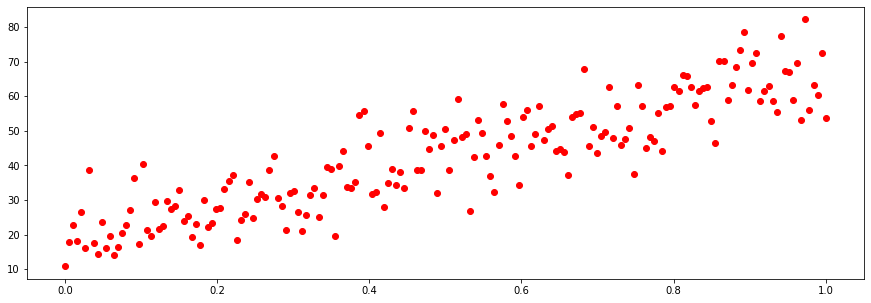

In [9]:
plt.figure(figsize=(15,5))
plt.plot(data.x, data.y, 'o', c='r');

### No to budujemy!!! - pierwszy model[<sup>1</sup>](#fn1)
<span id="fn1">Aurélien Géron, Uczenie maszynowe z użyciem Scikit-Learn i TensorFlow, O'Reilly, 2018, s.119-124.</span>

In [10]:
display(Math(r'f(x) = ax + b'))
display(Math(r'f(X) = \theta_0 + \theta_1 x_1 + \dots + \theta_n x_n'))
display(Math(r'f(X) = \Theta^T \cdot X'))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [11]:
model = LinearRegression()
model.fit(np.array(data.x).reshape(-1,1), data.y);

In [12]:
print('a =',model.coef_[0])
print('b =',model.intercept_)

a = 48.951299935392704
b = 18.22474991605934


In [13]:
y_predict = model.predict(np.array(data.x).reshape(-1,1))

In [14]:
print('Mean Absolute Error')
display(Math(r'MAE = \frac{1}{n} \sum\limits_{i=1}^{n} | \hat{y} _{i} - y_i|'))

Mean Absolute Error


<IPython.core.display.Math object>

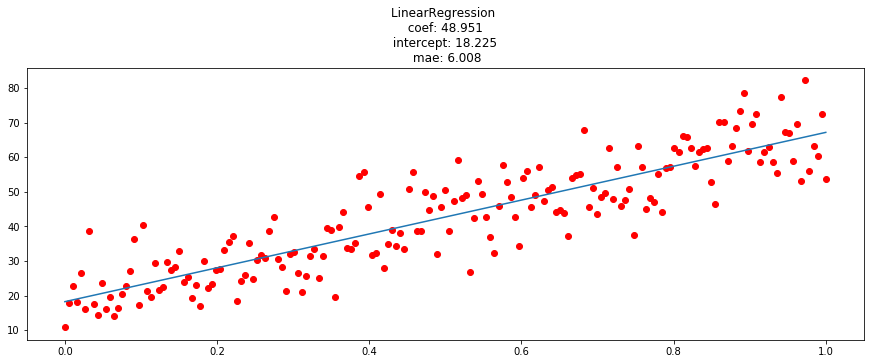

In [15]:
coef = np.round(model.coef_[0],3)
intercept = np.round(model.intercept_,3)
mae_coef = np.round(mae(y_predict,data.y),3)

plt.figure(figsize=(15,5))
plt.title('LinearRegression \n coef: {} \n intercept: {} \n mae: {}'.format(coef, intercept, mae_coef))
plt.plot(data.x, data.y, 'o', c='r')
plt.plot(data.x,y_predict);

#### Co tam się dzieje??? 

In [16]:
def normal_equation(X,y):
    X_b = np.c_[X,np.ones((len(X),1))]
    theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
    
    return list(theta_best)

In [17]:
display(Math(r' \hat{\Theta} = (X_b^T \cdot X_b)^{-1} \cdot X^T \cdot y'))
normal_equation(data.x,data.y)

<IPython.core.display.Math object>

[48.95129993539268, 18.22474991605935]